# Exploratory Data Analysis

## Dataset Info

The dataset under consideration is a subset of the ParaNMT corpus, which originally contains 50 million sentence pairs. This filtered subset is referred to as the ParaNMT-detox corpus and consists of 500,000 sentence pairs. It is specifically designed for the detoxification task

### Dataset columns

| Column | Discription | 
| ----- | ---------- |
| reference | Initial text with toxic attitude | 
| translation | Translated non-toxic version of the original text |
| similarity | Cosine similarity of the texts |
| lenght_diff | Difference between lengths of texts |
| ref_tox | Reference text toxicity value | 
| trn_tox | Translation text toxicity value |

## Loading the data

I have built a great module, which incapsulates dataset loading logic and makes all 'dirty' work. So lets use it!

In [1]:
import os
import sys
sys.path.append("../")
from src.data.make_dataset import load_df

In [2]:
df = load_df()

Using already preprocessed saved data.


This function already does some very and very basic preprocessing. Below I will show you it.

In [3]:
import pandas as pd
import numpy as np
from definitions import ROOT_DIR

In [4]:
initial_df = pd.read_csv(os.path.join(ROOT_DIR, "data/raw/filtered.tsv"), sep="\t")
initial_df.head(2)

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039


In [5]:
df.head(2)

,Unnamed: 0,reference,translation,similarity,length_diff,ref_tox,trn_tox,reference_length,translation_length,common_words,common_words_count
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983,15,16,"{'with', 'the', 'her', 'of', 'if', 'alkar', 'w...",8
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039,4,3,"{""you're""}",1


Basically, it does the folowing:
1) Removes typo in length_diff
2) Adds columns with reference and translation width
3) Adds column with common words
4) Counts common words
5) Removes duplicates

## Data Visualization

Here I plotted different visualizations for noticing any interesting dependencies/properties of the data.

In [9]:
from src.visualize.visualize import visualize
from IPython.display import Image

In [7]:
distributions_path, boxplot_path, correlations_path = visualize(df)

Generating distributions
Generating boxplots
Generating correlation matrix


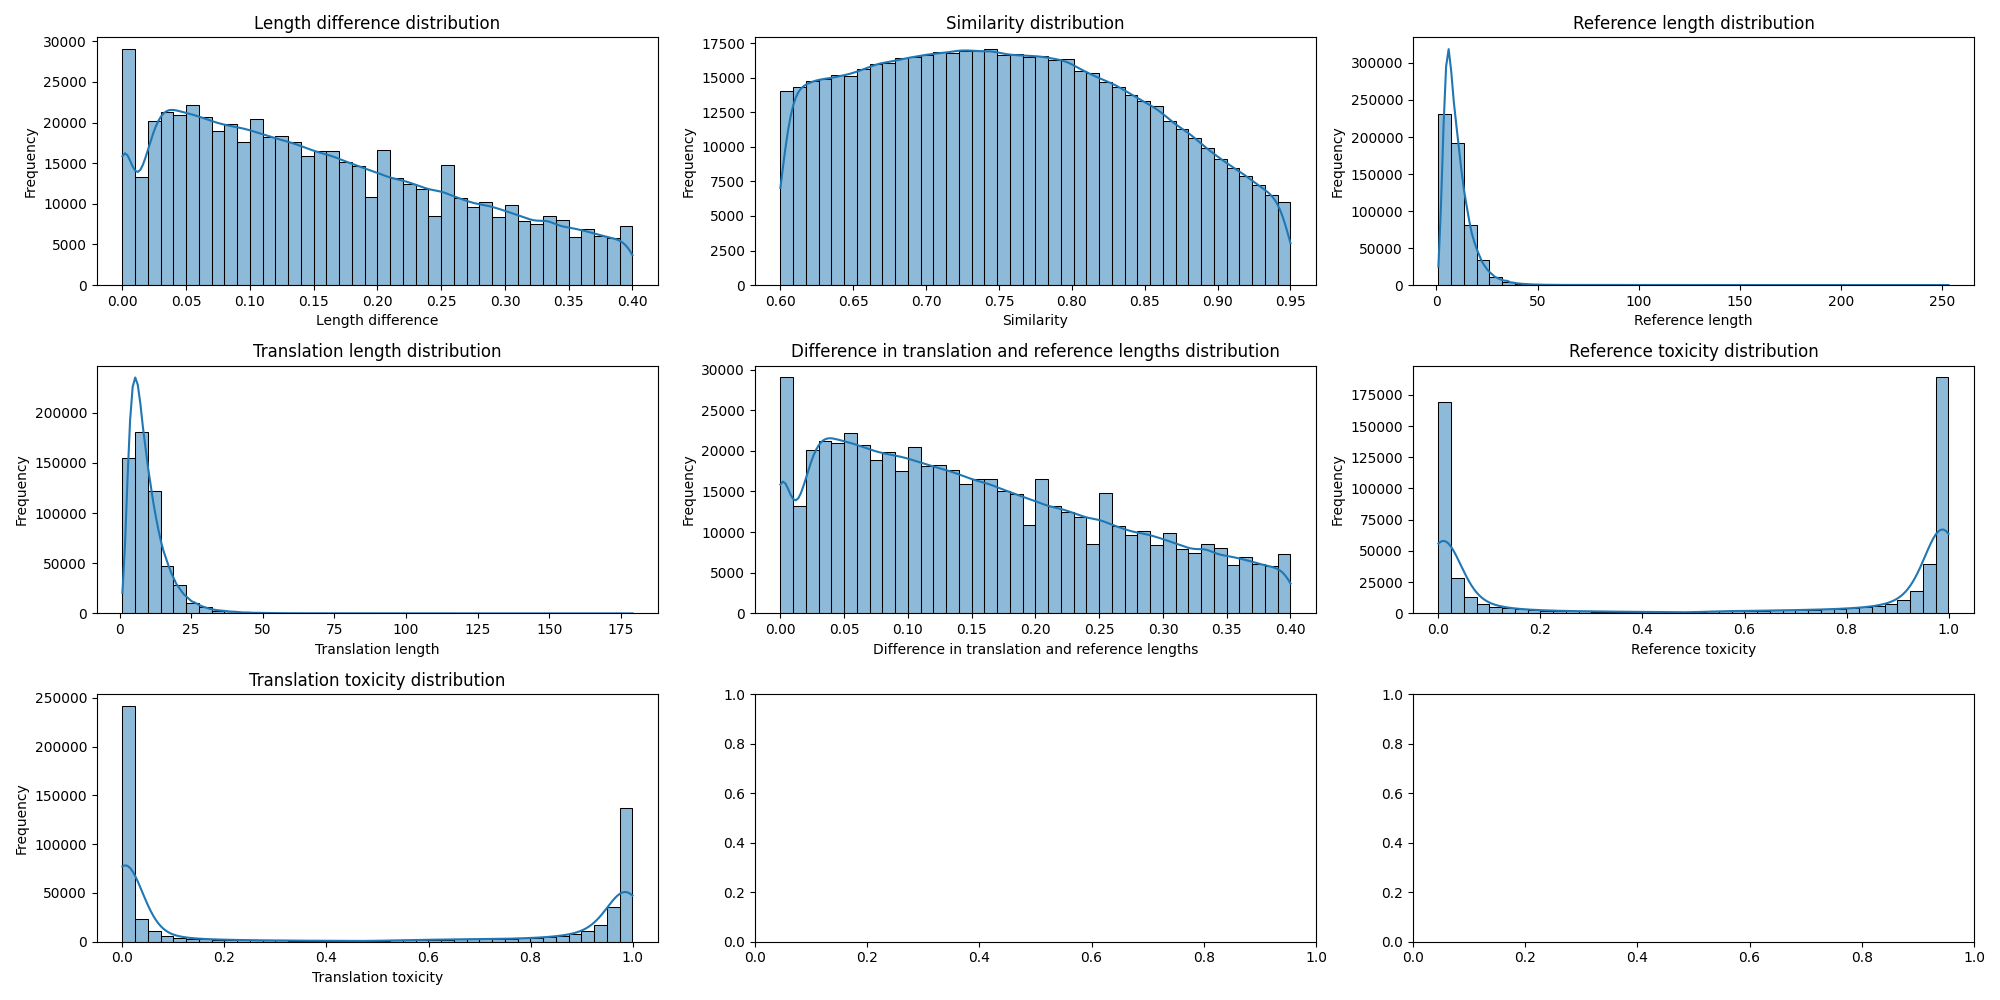

In [10]:
Image(filename=distributions_path)

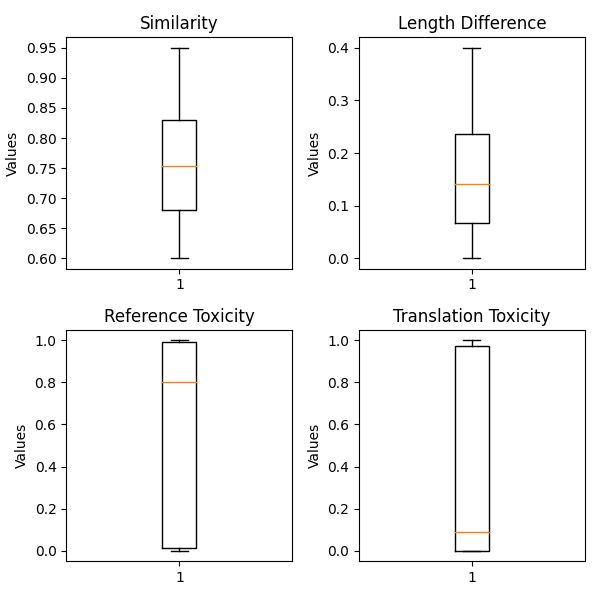

In [11]:
Image(filename=boxplot_path)

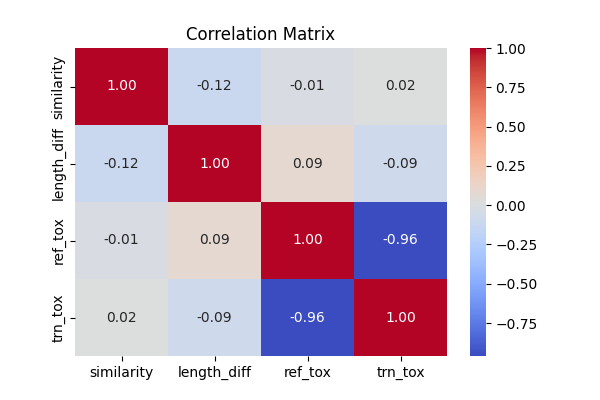

In [12]:
Image(filename=correlations_path)

Below are statistical properties of the dataset.

In [13]:
df.describe()

,Unnamed: 0,similarity,length_diff,ref_tox,trn_tox,reference_length,translation_length,common_words_count
count,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000
mean,286254.204706,0.757504,0.156967,0.540383,0.435356,10.428982,9.823013,4.797594
std,166908.330407,0.092229,0.107717,0.457531,0.458773,7.096470,6.934946,3.427128
min,0.000000,0.600001,0.000000,0.000033,0.000033,1.000000,1.000000,0.000000
25%,141275.500000,0.680582,0.066667,0.012184,0.000747,6.000000,5.000000,2.000000
50%,285022.000000,0.753365,0.140288,0.802939,0.088179,9.000000,8.000000,4.000000
75%,430510.500000,0.829740,0.236842,0.990246,0.973573,13.000000,12.000000,6.000000
max,577776.000000,0.950000,0.400000,0.999724,0.999730,253.000000,179.000000,52.000000
